# Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### 1) Скачайте файл с предложениями (sentences.txt).

In [1]:
# reading file
text=open('sentences.txt','r')

In [2]:
# new list with text
text_list=text.readlines()
text_list

['In comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n',
 'A common interactive use of cat for a single file is to output the content of a file to standard output.\n',
 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n',
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n',
 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n',
 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n',
 'However, if the output is piped or redirected, cat is unnecessary.\n',
 'cat with one named file is safer whe

#### 2) Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [3]:
# to lower case
import copy
text_list2=copy.deepcopy(text_list)
for i in range(len(text_list2)):
    text_list2[i]=text_list2[i].lower()
text_list2

['in comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.\n',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n',
 'however, if the output is piped or redirected, cat is unnecessary.\n',
 'cat with one named file is safer whe

#### 3) Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [4]:
# splitting words
import re
for i in range(len(text_list2)):
    text_list2[i]=re.split('[^a-z]', text_list2[i])

In [5]:
# removing trash
def removing(text):
    for i in range(len(text_list2)):
        if '' in text_list2[i]:
            text_list2[i].remove('')
            return removing(text)
removing(text_list2)
text_list2

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

#### 4) Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [6]:
# list with words
list_words=[]
for line in text_list2:
    for word in line:
        list_words.append(word)
list_words=list(set(list_words))

In [7]:
# sortin and deleting digits
list_words.sort()
del list_words[0:13]
list_words

['are',
 'arguments',
 'artificial',
 'as',
 'available',
 'based',
 'basic',
 'be',
 'between',
 'binary',
 'both',
 'by',
 'bytes',
 'can',
 'cat',
 'catenates',
 'cats',
 'changes',
 'chromosomes',
 'clear',
 'closest',
 'command',
 'commands',
 'common',
 'community',
 'comparison',
 'computers',
 'concatenate',
 'concern',
 'connected',
 'contains',
 'content',
 'count',
 'create',
 'default',
 'delete',
 'deliberately',
 'developed',
 'diploid',
 'disk',
 'displays',
 'dogs',
 'domestic',
 'domesticated',
 'domestication',
 'download',
 'drive',
 'during',
 'ears',
 'editions',
 'enhancements',
 'entirely',
 'error',
 'every',
 'external',
 'factory',
 'faint',
 'features',
 'felis',
 'fifth',
 'file',
 'files',
 'firmware',
 'flow',
 'for',
 'frequency',
 'from',
 'genes',
 'genus',
 'has',
 'have',
 'hear',
 'high',
 'however',
 'human',
 'if',
 'in',
 'incremental',
 'information',
 'installation',
 'installed',
 'installs',
 'instead',
 'intel',
 'interactive',
 'is',
 'it',


In [8]:
# dictionary with words
d = {list_words[i]: i for i in range(len(list_words))}
d

{'are': 0,
 'arguments': 1,
 'artificial': 2,
 'as': 3,
 'available': 4,
 'based': 5,
 'basic': 6,
 'be': 7,
 'between': 8,
 'binary': 9,
 'both': 10,
 'by': 11,
 'bytes': 12,
 'can': 13,
 'cat': 14,
 'catenates': 15,
 'cats': 16,
 'changes': 17,
 'chromosomes': 18,
 'clear': 19,
 'closest': 20,
 'command': 21,
 'commands': 22,
 'common': 23,
 'community': 24,
 'comparison': 25,
 'computers': 26,
 'concatenate': 27,
 'concern': 28,
 'connected': 29,
 'contains': 30,
 'content': 31,
 'count': 32,
 'create': 33,
 'default': 34,
 'delete': 35,
 'deliberately': 36,
 'developed': 37,
 'diploid': 38,
 'disk': 39,
 'displays': 40,
 'dogs': 41,
 'domestic': 42,
 'domesticated': 43,
 'domestication': 44,
 'download': 45,
 'drive': 46,
 'during': 47,
 'ears': 48,
 'editions': 49,
 'enhancements': 50,
 'entirely': 51,
 'error': 52,
 'every': 53,
 'external': 54,
 'factory': 55,
 'faint': 56,
 'features': 57,
 'felis': 58,
 'fifth': 59,
 'file': 60,
 'files': 61,
 'firmware': 62,
 'flow': 63,
 'fo

#### 5) Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [9]:
# creating matrix
import numpy as np
matrix=np.zeros((len(text_list2),len(list_words)))
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# filling
for i in range(len(text_list)):
    for j in range(len(list_words)):
        matrix[i][j]=text_list2[i].count(list_words[j])
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 6) Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [24]:
# cos distance
from scipy.spatial import distance
cos_dist=np.array([])
for i in range(len(text_list2)):
    cos_dist=np.append(cos_dist,distance.cosine(matrix[0],matrix[i]))
cos_dist

array([0.        , 0.95199846, 0.84275727, 0.89089105, 0.77207885,
       0.93099344, 0.70839408, 0.92587507, 0.88178344, 0.8971311 ,
       0.83281654, 0.87737213, 0.83281654, 0.86636938, 0.86198689,
       0.94167882, 0.81929842, 0.95199846, 0.94023857, 0.88047714,
       0.83633658, 0.8160582 ])

In [25]:
# first min element
min1=cos_dist.min()
min1_ind=cos_dist.argmin()
print(f'first minimum — {min1}, its index — {min1_ind}')

first minimum — 0.0, its index — 0


In [26]:
# second min element
min2=np.amin(np.array(cos_dist)[cos_dist != min1])
min2_ind=np.where(cos_dist == min2)
print(f'second minimum — {min2}, its index — {min2_ind[0][0]}')

second minimum — 0.7083940782400979, its index — 6


#### 7) Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [27]:
# writing in a new file
file_obj = open('new_file.txt', 'w')
string = '6 4'
file_obj.write(string)
file_obj.close()

In [28]:
!cat 'new_file.txt'

6 4

#### 8) Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [16]:
# topics of first two closest sentences
print(f'{text_list[5]}{text_list[3]}')

The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.
Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.



_Можно сказать, что да, два первых ближайших предложения совпадают. Они оба про физические особенности кошек._

In [17]:
# finding 3rd & 4th min element
cos_dist2=np.delete(cos_dist, [5,3])
min3=cos_dist2.min()
min3_ind=cos_dist2.argmin()
min4=np.amin(np.array(cos_dist2)[cos_dist2 != min3])
min4_ind=np.where(cos_dist2 == min4)
print(f'third minimum — {min3}, its index — {min3_ind}\nforth minimum — {min4}, its index — {min4_ind[0][0]}')

third minimum — 0.8160581981545103, its index — 18
forth minimum — 0.8192984194189498, its index — 13


In [18]:
# topics of second two closest sentences
print(f'{text_list[18]}{text_list[13]}')

Apple has released a small patch for the three most recent versions of Safari running on OS X Yosemite, Mavericks, and Mountain Lion.
Leopard was released on October 26, 2007 as the successor of Tiger (version 10.4), and is available in two editions.



_Можно сказать, что да, два вторых ближайших предложения похожи по смыслу. Они оба про новые версии операционных и программных систем._

# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$ f(x) = \sin(\frac{x}{5}) \cdot \exp(\frac{x}{10}) + 5 \cdot \exp(\frac{-x}{2}) $
![title](image01.png)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени $ n $ (то есть $ w_0 + w_1 \cdot x + w_2\cdot x^2 + ... + w_n\cdot x^n $ ) однозначно определяется любыми $ n + 1 $ различными точками, через которые он проходит. Это значит, что его коэффициенты $ w_0,...,w_n $ можно определить из следующей системы линейных уравнений:
![title](lineqn.png)

где через $ x_1, ...,x_n, x_{n+1} $ обозначены точки, через которые проходит многочлен, а через $ f(x_1), ..., f(x_n), f(x_{n+1}) $ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

#### 1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [19]:
# defining function [1;15]
# from math import sin,exp
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

In [29]:
# defining A,b and solving x
b=np.array([f(i) for i in range(1,16,4)])
A=np.column_stack(([1**i for i in range(1,16,4)],[i for i in range(1,16,4)],[i**2 for i in range(1,16,4)],[i**3 for i in range(1,16,4)]))
x=np.linalg.solve(A,b)
x

array([ 4.333284  , -1.26768762,  0.19524631, -0.00862582])

In [21]:
%matplotlib inline
from matplotlib import pylab as plt

In [22]:
[f(i) for i in [1,15]]

[3.252216865271419, 0.6352214195786656]

In [23]:
from scipy import interpolate
f1=interpolate.interp1d([1,15],x,kind='cubic')

x1 = np.array([1,15])

x_new=np.array([1,15])
y_new=f1(x_new)

plt.plot(x1,f(x1),'-',x_new,y_new,'-')
plt.show()

ValueError: The number of derivatives at boundaries does not match: expected 2, got 0+0

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


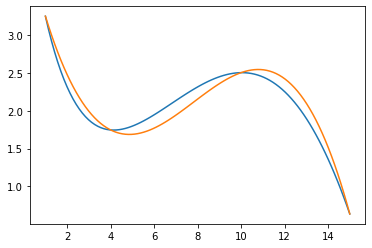

In [31]:
# approximate at the given points (feel free to experiment: change/add/remove)
points = np.array([1, 4, 10, 15])
n = points.size

# fill A-matrix, each row is 1 or xi^0, xi^1, xi^2, xi^3 .. xi^n
A = np.zeros((n, n))
for index in range(0, n):
    A[index] = np.power(np.full(n, points[index]), np.arange(0, n, 1))

# fill b-matrix, i.e. function value at the given points
b = f(points)

# solve to get approximation polynomial coefficents
solve = np.linalg.solve(A,b)

# define the polynome approximation of the function
def polinom(x): 
    # Yi = solve * Xi where Xi = x^i
    tiles = np.tile(x, (n, 1))
    tiles[0] = np.ones(x.size)
    for index in range(1, n):
        tiles[index] = tiles[index]**index
    return solve.dot(tiles)

# plot the graphs of original function and its approximation
x = np.linspace(1, 15, 100)
plt.plot(x, f(x))
plt.plot(x, polinom(x))

# print out the coefficients of polynome approximating our function
print(solve)




#### 2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

#### 3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

#### 4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [32]:
# writing in a new file
file_obj = open('new_file2.txt', 'w')
string = '4.36264154 -1.29552587  0.19333685 -0.00823565'
file_obj.write(string)
file_obj.close()